**Importação das bibliotecas que serão utilizadas**

In [1]:
%tensorflow_version 1.x
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
import sklearn.metrics as metrics




TensorFlow 1.x selected.


Using TensorFlow backend.


**Chamada dos drive**

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Declarar arquivos csv**

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/relatorio.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/teste.csv')


In [0]:
test

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0       0     115     114     116  ...        63        56        56        50
1       0     255     255     255  ...       255       255       255       255
2       0     255     255     255  ...       255       255       255       255
3       0     255     255     255  ...       255       255       255       255
4       0     255     255     255  ...       255       255       255       255
5       0     255     255     255  ...       255       255       255       255
6       0     254     254     254  ...       254       254       254       254
7       0     255     255     255  ...       255       255        27        29
8       1     244     255     255  ...       255       255       244       255
9       1     244     244     244  ...       216       213       213       212
10      1     247     247     247  ...       251       167       150       254
11      1     255     255     255  ...       255       251       246       247
12      1     210     210     213  ...       198       195       192       186

[13 rows x 785 columns]

In [0]:
train.shape
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

train.drop('label', axis = 1, inplace = True)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 20)

print(x_train.shape)
print(x_test.shape)

(32, 784)
(14, 784)


**Exemplo de imagem**

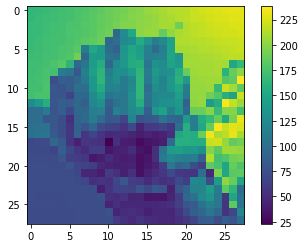

In [0]:
plt.imshow(x_train[0].reshape(28,28))
plt.colorbar()

**Variáveis utilizadas no modelo**

In [0]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss')]

batch_size = 128
num_classes = 2
epochs = 100
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


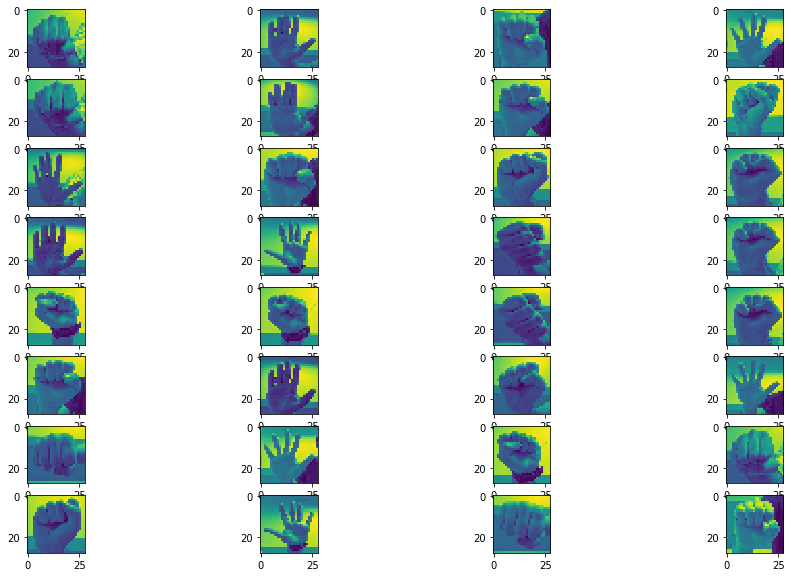

In [0]:
plt.figure(figsize=(16, 10))
for imagem in range(32):
  plt.subplot(8, 4, imagem+1)
  plt.imshow(x_train[imagem].reshape(28,28))

**Criação do modelo**

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=callbacks)







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 25 samples, validate on 7 samples
Epoch 1/100





25/25 [==============================] - 1s 32ms/step - loss: 0.6944 - acc: 0.5200 - val_loss: 0.6537 - val_acc: 0.7143
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6562 - acc: 0.6800 - val_loss: 0.6197 - val_acc: 0.7143
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6237 - acc: 0.6800 - val_loss: 0.5898 - val_acc: 0.7143
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6013 - acc: 0.6800 - val_loss: 0.5617 - val_acc: 0.7143
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5813 - acc: 0.6800 - val_loss: 0.5292 - val_acc: 0.7143
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.52

**Salvamento do modelo**

In [0]:
from tensorflow.keras.models import load_model

model.save('model.h5')
model_salvo = load_model('model.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


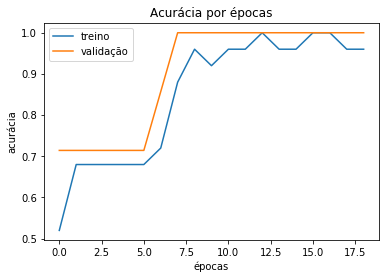

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

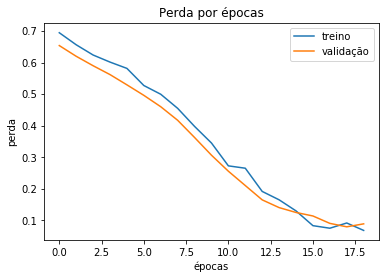

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

**Testes com as imagens ja do modelo**

In [0]:
tests = model.predict(x_train)
for predict in range(32):
  print('resultado teste:', np.argmax(tests[predict]))
  print('número da imagem de teste:', y_train[predict])

resultado teste: 1
número da imagem de teste: [1]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]


**Testes com imagens pegadas do Google**

In [0]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
tests = model.predict(test_images)
for predict in range(13):
  print('resultado teste:', np.argmax(tests[predict]))
  print('número da imagem de teste:', test_labels[predict])

resultado teste: 0
número da imagem de teste: [0]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 0
número da imagem de teste: [0]
resultado teste: 1
número da imagem de teste: [0]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]
resultado teste: 1
número da imagem de teste: [1]


**Exemplo das imagens pegadas do Google**

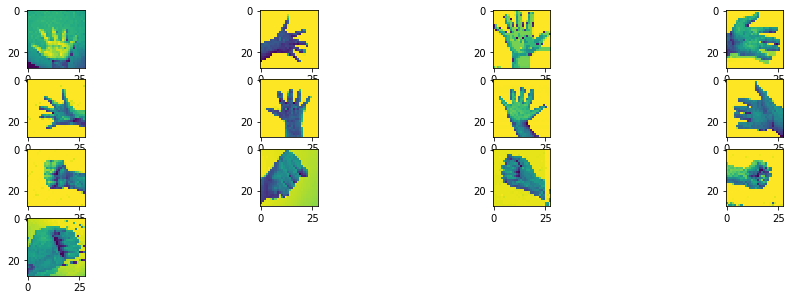

In [0]:
plt.figure(figsize=(16, 10))
for imagem in range(13):
  plt.subplot(8, 4, imagem+1)
  plt.imshow(test_images[imagem].reshape(28,28))